# 27 Keras MNIST

In [1]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/tir/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Conv2D:

* number of channels
* convolutions operate over 3D tensors (height, width, depth or channels), called feature maps 
* BW image

In [2]:
model = models.Sequential()

# Takes a feature map of size (28, 28, 1), output feature map of size (26, 26, 32)
# Computes 32 filters over the input. Each of these 32 output channels contain a 26x26 grid of values
# which is a response map of the filter over the input, indicating the response of that filter pattern
# at different locations in the input. Adjust padding and strides.
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))

# Max-pooling downsamples the results of Conv2D with a max operation of (2, 2)
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

Text(0.5,1,'5')

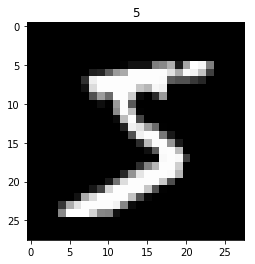

In [6]:
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
22272/60000 [==========>...................] - ETA: 37s - loss: 0.3271 - acc: 0.9002

KeyboardInterrupt: 

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 329us/step


In [12]:
test_acc

0.9921

4

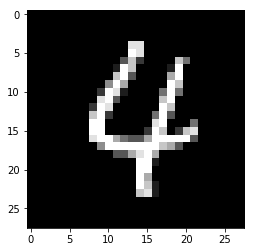

In [24]:
test_index = 109
plt.imshow(X_test[test_index].reshape(28, 28), cmap="gray")
model.predict(X_test[test_index].reshape(1, 28, 28, 1))
np.argmax(model.predict(X_test[test_index].reshape(1, 28, 28, 1)))

### Categorical cross-entropy loss

In [ ]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    return -np.log(1 - yHat)

In [ ]:
x_pred = np.linspace(0.01, 1, 100)
plt.plot(x_pred, cross_entropy(x_pred, 1))
plt.xlabel("model prediction")
plt.title("true value 1")

### Softmax

In [ ]:
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

In [ ]:
softmax([1, 2, 3])